In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("cars_2025.csv")
df.head()

,date_reg,type,maker,model,colour,fuel,state
0,1/1/2025,motokar,BYD,Seal,white,electric,Rakan Niaga
1,1/1/2025,window_van,Cam,Placer-X,yellow,greendiesel,Johor
2,1/1/2025,jip,Chery,Jaecoo J7,green,petrol,Rakan Niaga
3,1/1/2025,jip,Chery,Jaecoo J7,silver,petrol,Rakan Niaga
4,1/1/2025,jip,Chery,Tiggo,grey,petrol,Rakan Niaga


In [3]:
df.shape

(614068, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614068 entries, 0 to 614067
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date_reg  614068 non-null  object
 1   type      614068 non-null  object
 2   maker     614068 non-null  object
 3   model     614068 non-null  object
 4   colour    614068 non-null  object
 5   fuel      614068 non-null  object
 6   state     614068 non-null  object
dtypes: object(7)
memory usage: 32.8+ MB


In [5]:
df.describe(include='object')

,date_reg,type,maker,model,colour,fuel,state
count,614068,614068,614068,614068,614068,614068,614068
unique,273,5,90,502,16,8,15
top,28/2/2025,motokar,Perodua,Bezza,grey,petrol,Rakan Niaga
freq,14838,353546,255094,72212,154933,529702,527418


In [6]:
# Check missing values
df.isnull().sum()

date_reg    0
type        0
maker       0
model       0
colour      0
fuel        0
state       0
dtype: int64

In [7]:
# Drop rows with missing values
df = df.dropna()

In [8]:
df['date_reg'] = pd.to_datetime(df['date_reg'], errors='coerce')

In [11]:
df['reg_month'] = df['date_reg'].dt.to_period('M')

In [12]:
monthly_count = df['reg_month'].value_counts().sort_index()
monthly_count

reg_month
2025-01     1731
2025-02     2710
2025-03     4125
2025-04     5684
2025-05     6129
2025-06     6648
2025-07     8280
2025-08     8787
2025-09     9201
2025-10    12077
2025-11    12813
2025-12    12127
Freq: M, Name: count, dtype: int64

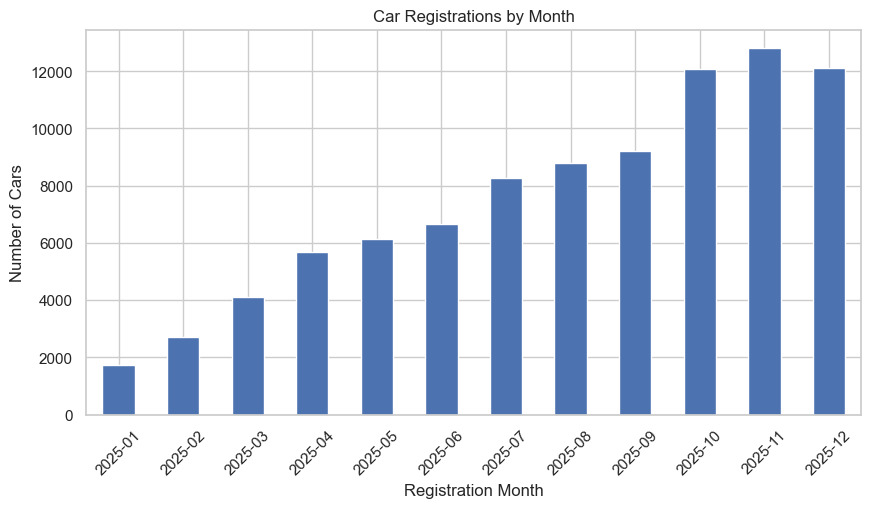

In [13]:
plt.figure(figsize=(10,5))
monthly_count.plot(kind='bar')
plt.title("Car Registrations by Month")
plt.xlabel("Registration Month")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

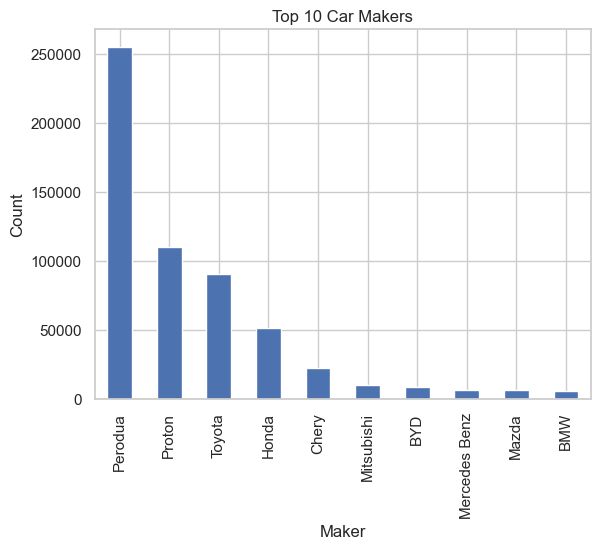

In [15]:
plt.figure()
df['maker'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Car Makers")
plt.xlabel("Maker")
plt.ylabel("Count")
plt.show()

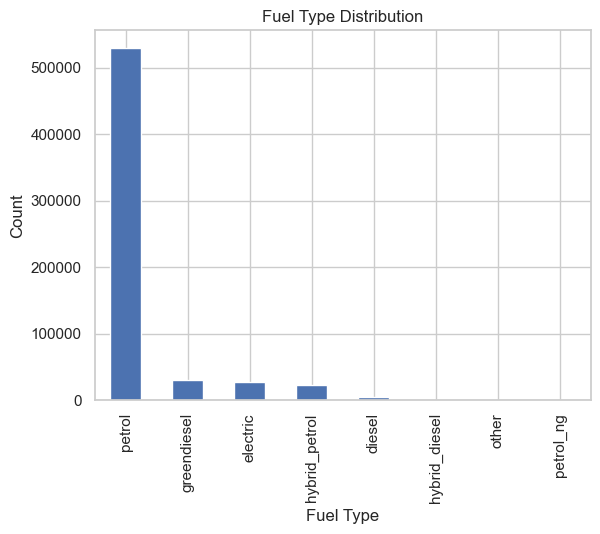

In [16]:
plt.figure()
df['fuel'].value_counts().plot(kind='bar')
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

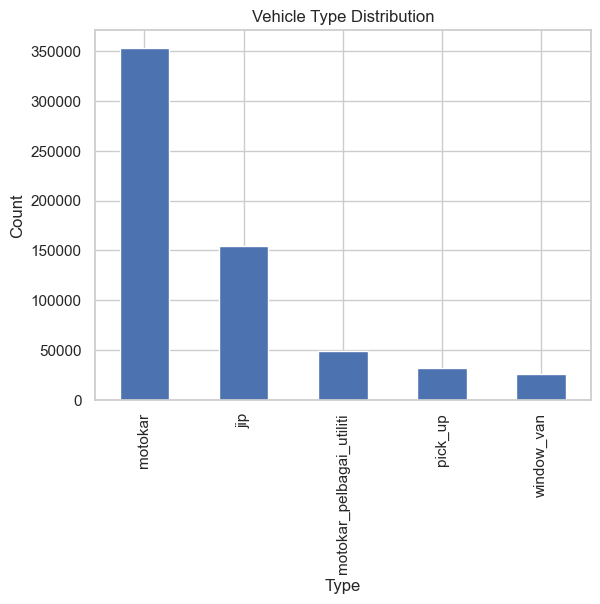

In [17]:
plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title("Vehicle Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

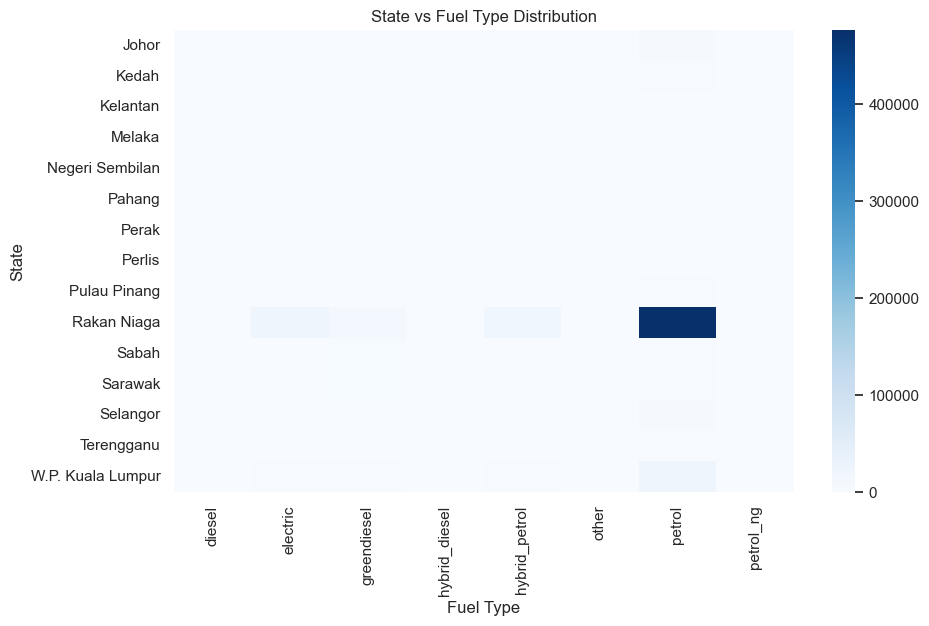

In [18]:
pivot = pd.crosstab(df['state'], df['fuel'])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Blues')
plt.title("State vs Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("State")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_6376\1964944637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.values, y=model_counts.index, palette="viridis")


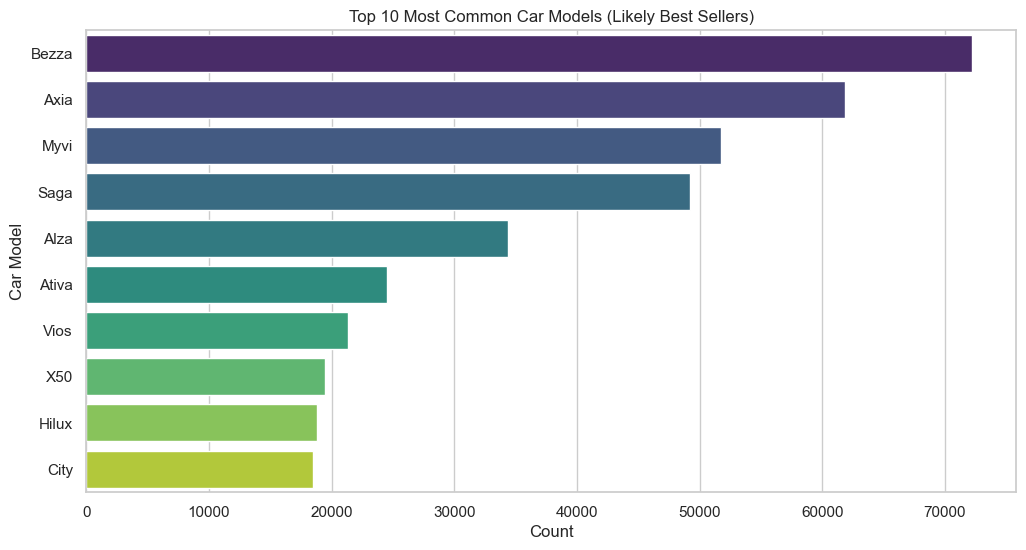

In [19]:
# Count unique models
model_counts = df['model'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=model_counts.values, y=model_counts.index, palette="viridis")
plt.title("Top 10 Most Common Car Models (Likely Best Sellers)")
plt.xlabel("Count")
plt.ylabel("Car Model")
plt.show()